In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import plotly.express as px

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [6]:
data.isna().sum().sum()

6965

**From this we can see the columns name which have many missing values like Alley,PoolQC,Fence,MiscFeature**

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**From upper function we can see the spread of our data like saleprice has min value of 34900 and max 755000 same with other it help to understand the spread of data**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**From info it help to understand which column is object type and which one is numerical**

we have 38 numerical columns and 43 categorical columns

we have some columns that should be object

ex-mssubclass,overallqual,overallcond

they have converted them into numerical so no problem

so i will do analysis of that also

In [9]:
data1=data.select_dtypes(include='object').head()

In [10]:
{column:len(data[column].unique())for column in data.select_dtypes(include='object')}

{'MSZoning': 5,
 'Street': 2,
 'Alley': 3,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 5,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 6,
 'KitchenQual': 4,
 'Functional': 7,
 'FireplaceQu': 6,
 'GarageType': 7,
 'GarageFinish': 4,
 'GarageQual': 6,
 'GarageCond': 6,
 'PavedDrive': 3,
 'PoolQC': 4,
 'Fence': 5,
 'MiscFeature': 5,
 'SaleType': 9,
 'SaleCondition': 6}

**From upper code it help us to see how many unique values are there in each column**

#EDA

#Univariate Analysis

In [11]:
col=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','MSSubClass','OverallQual','OverallCond','GarageCars']

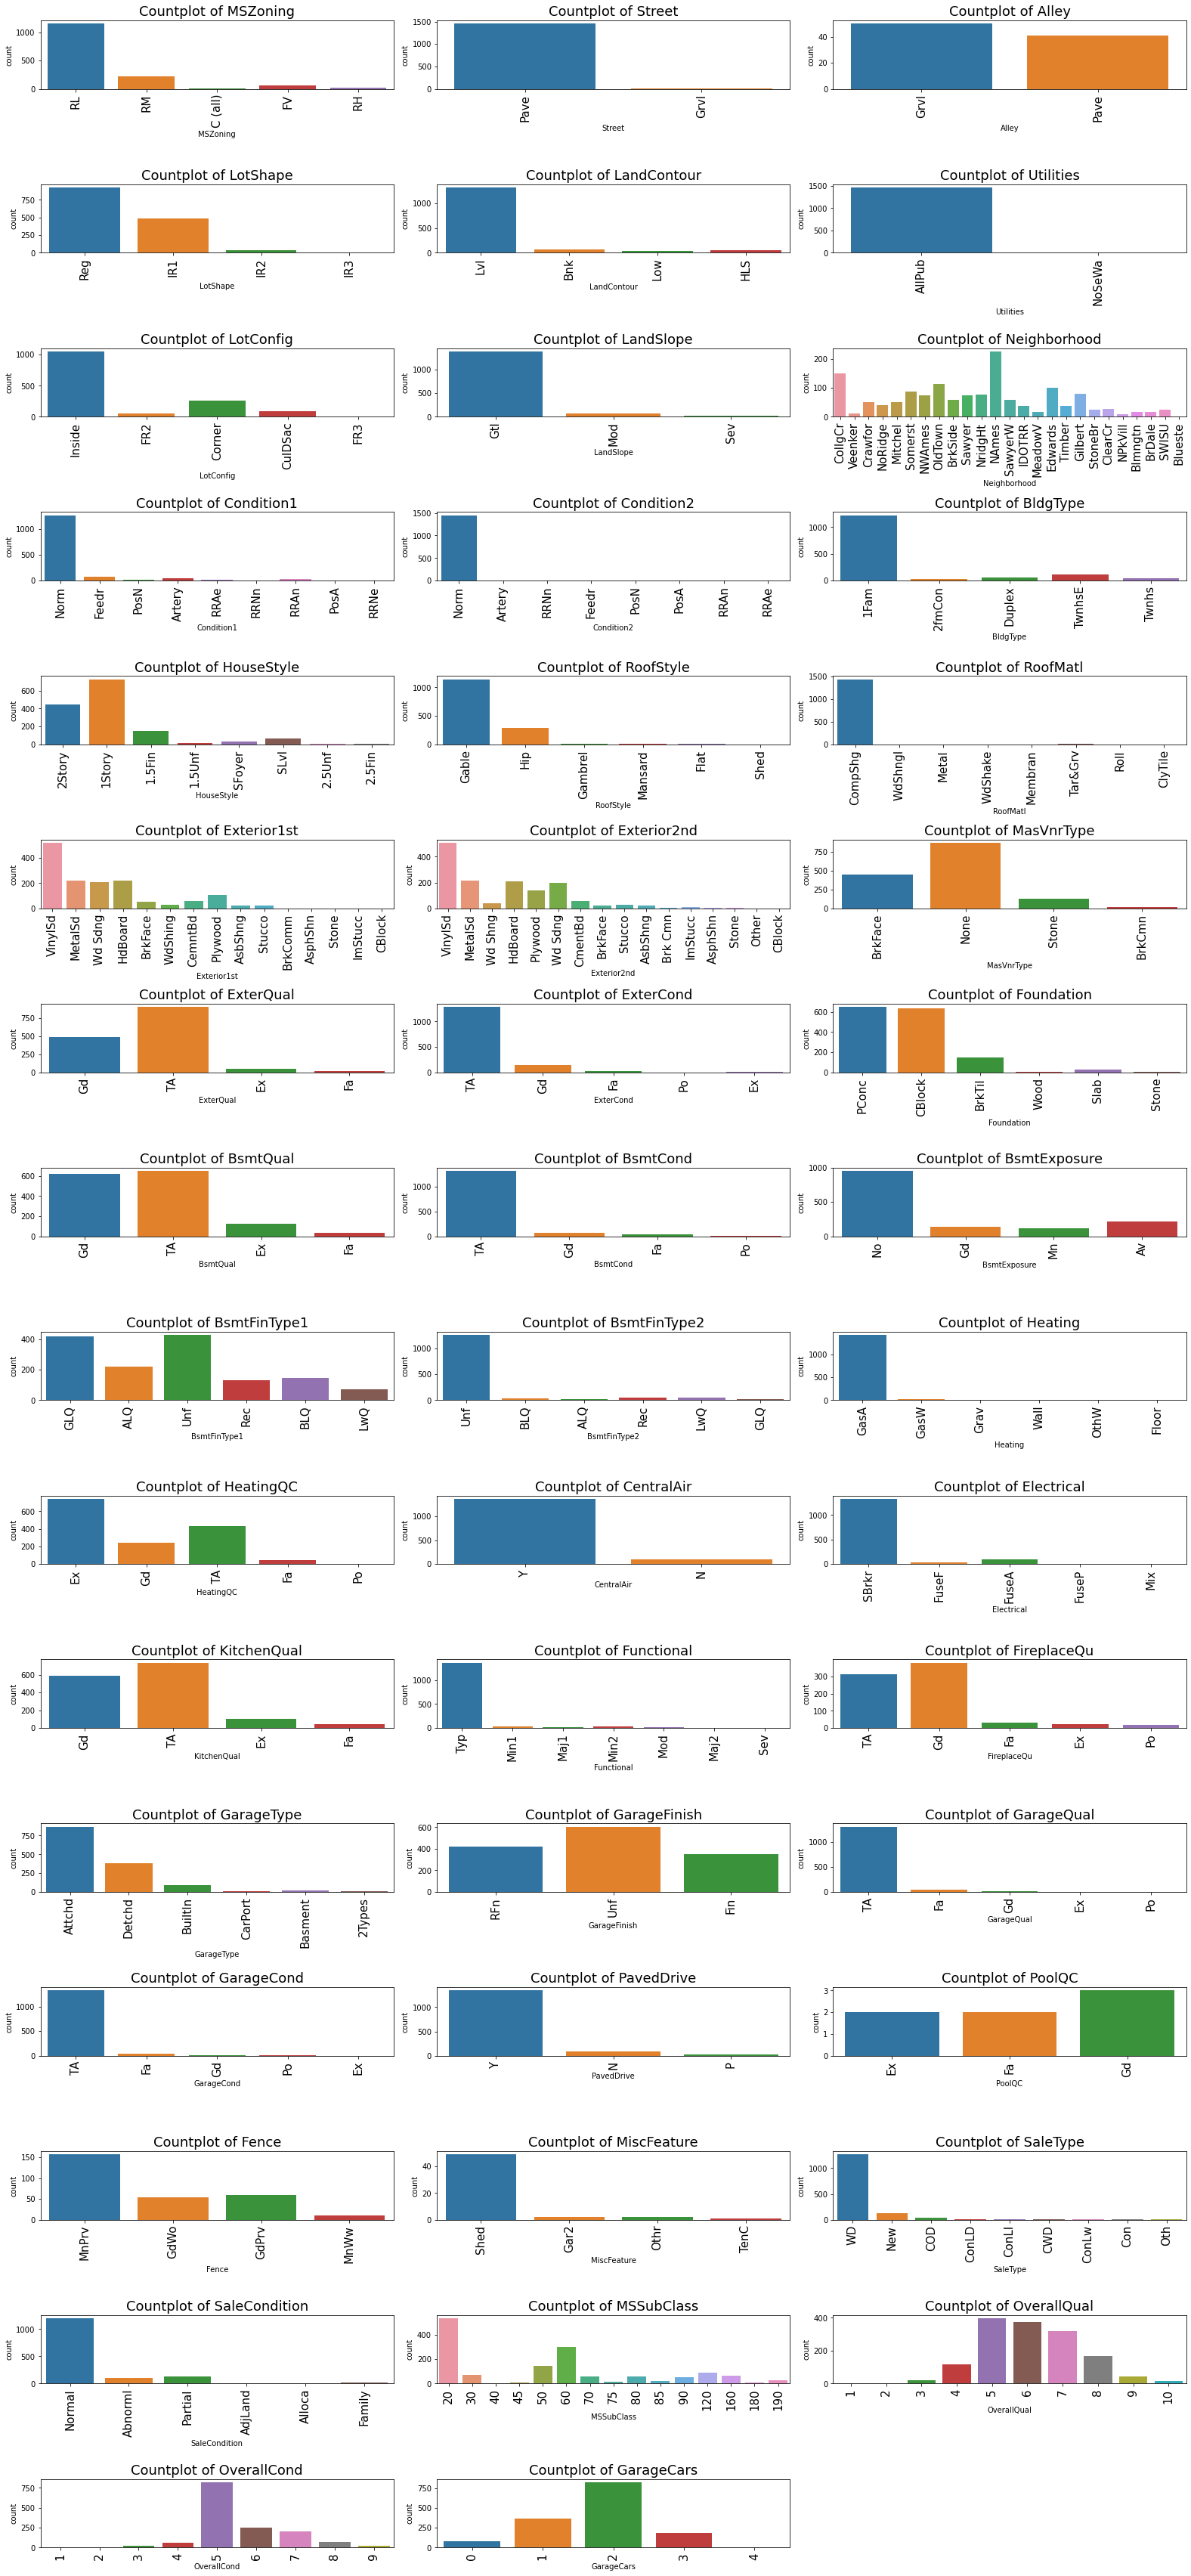

In [12]:
plt.figure(figsize=(22,300))
for i in range(len(col)):
    plt.subplot(100,3,i+1)
    sns.countplot(data[col[i]])
    plt.title(f"Countplot of {col[i]}",fontsize=18)
    plt.xticks(rotation=90,fontsize=15)
    plt.tight_layout() 

#Obseravtion
1-From MSZoning i can say most of the people like house that have zone Residential Low Density, low density says people like to live in more space like villas

2-From Street i can say most of the people like to have home that are paved

3-From Type of alley access to property i can say mostly people like to have home at grvl

4-From lotshape i can say mostly people like reg and very less people who like to live in IR2,IR3

5-From LandContour: Flatness of the property i can say mostly people like to live in Near Flat/Level

6-From Lot configuration i can say mostly people like inside lot and some people like 20% of people like corner plot

7-From LandSlope: Slope of property i can say mostly 90% of people like Gentle slope

8-From Neighborhood: Physical locations within Ames city limitsi can say mostly people like to have have at North Ames after this people also like College Creek

9-From Condition1: Proximity to various conditions i can say mostly people like Normal and same with condition 2

10-From BldgType: Type of dwelling i can say mostly people like Single-family Detached	

11-From HouseStyle: Style of dwelling i can say moslty people like onestory and twostory more

12-From RoofStyle: Type of roof i can say mostly people like Gable style

13-From RoofMatl: Roof material i can say mostly people like clay or tile on roof

14-From Exterior1st and Exterior2nd i can say moslty people like Vinyl Siding and people also like Metal Siding and hard bord

15-From MasVnrType: Masonry veneer type i can say people like None 

16-Form exterqual and extercond i can say mostly people are happy with Average quality

17-From Foundation: Type of foundation i can say moslty people like Cinder Block and Poured Contrete	

18-From bsmntqual and bsmtcond i can say people like Good (90-99 inches) and typical also

19-From BsmtExposure: Refers to walkout or garden level walls people like No Exposure

20-From BsmtFinType1: Rating of basement finished area i can say moslty people like Good Living Quarters and unfinished

21-From BsmtFinType2 i can say people like good living quarters

22-From CenteralAir i can say moslty people like to lave centeralair

23-From Electrical: Electrical system i can say people like SBrkr	Standard Circuit Breakers & Romex

24-From Countplot of Garage type i can say people love to have a home that have garage Attached to home

25-From Salestype i cna say people love to have a home that have Warranty Deed - Conventional

26-From salesconditon i can say people love to have a home that have normal condition 

In [13]:
data.select_dtypes('object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
data2=data.select_dtypes(exclude='object')

In [15]:
col1=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

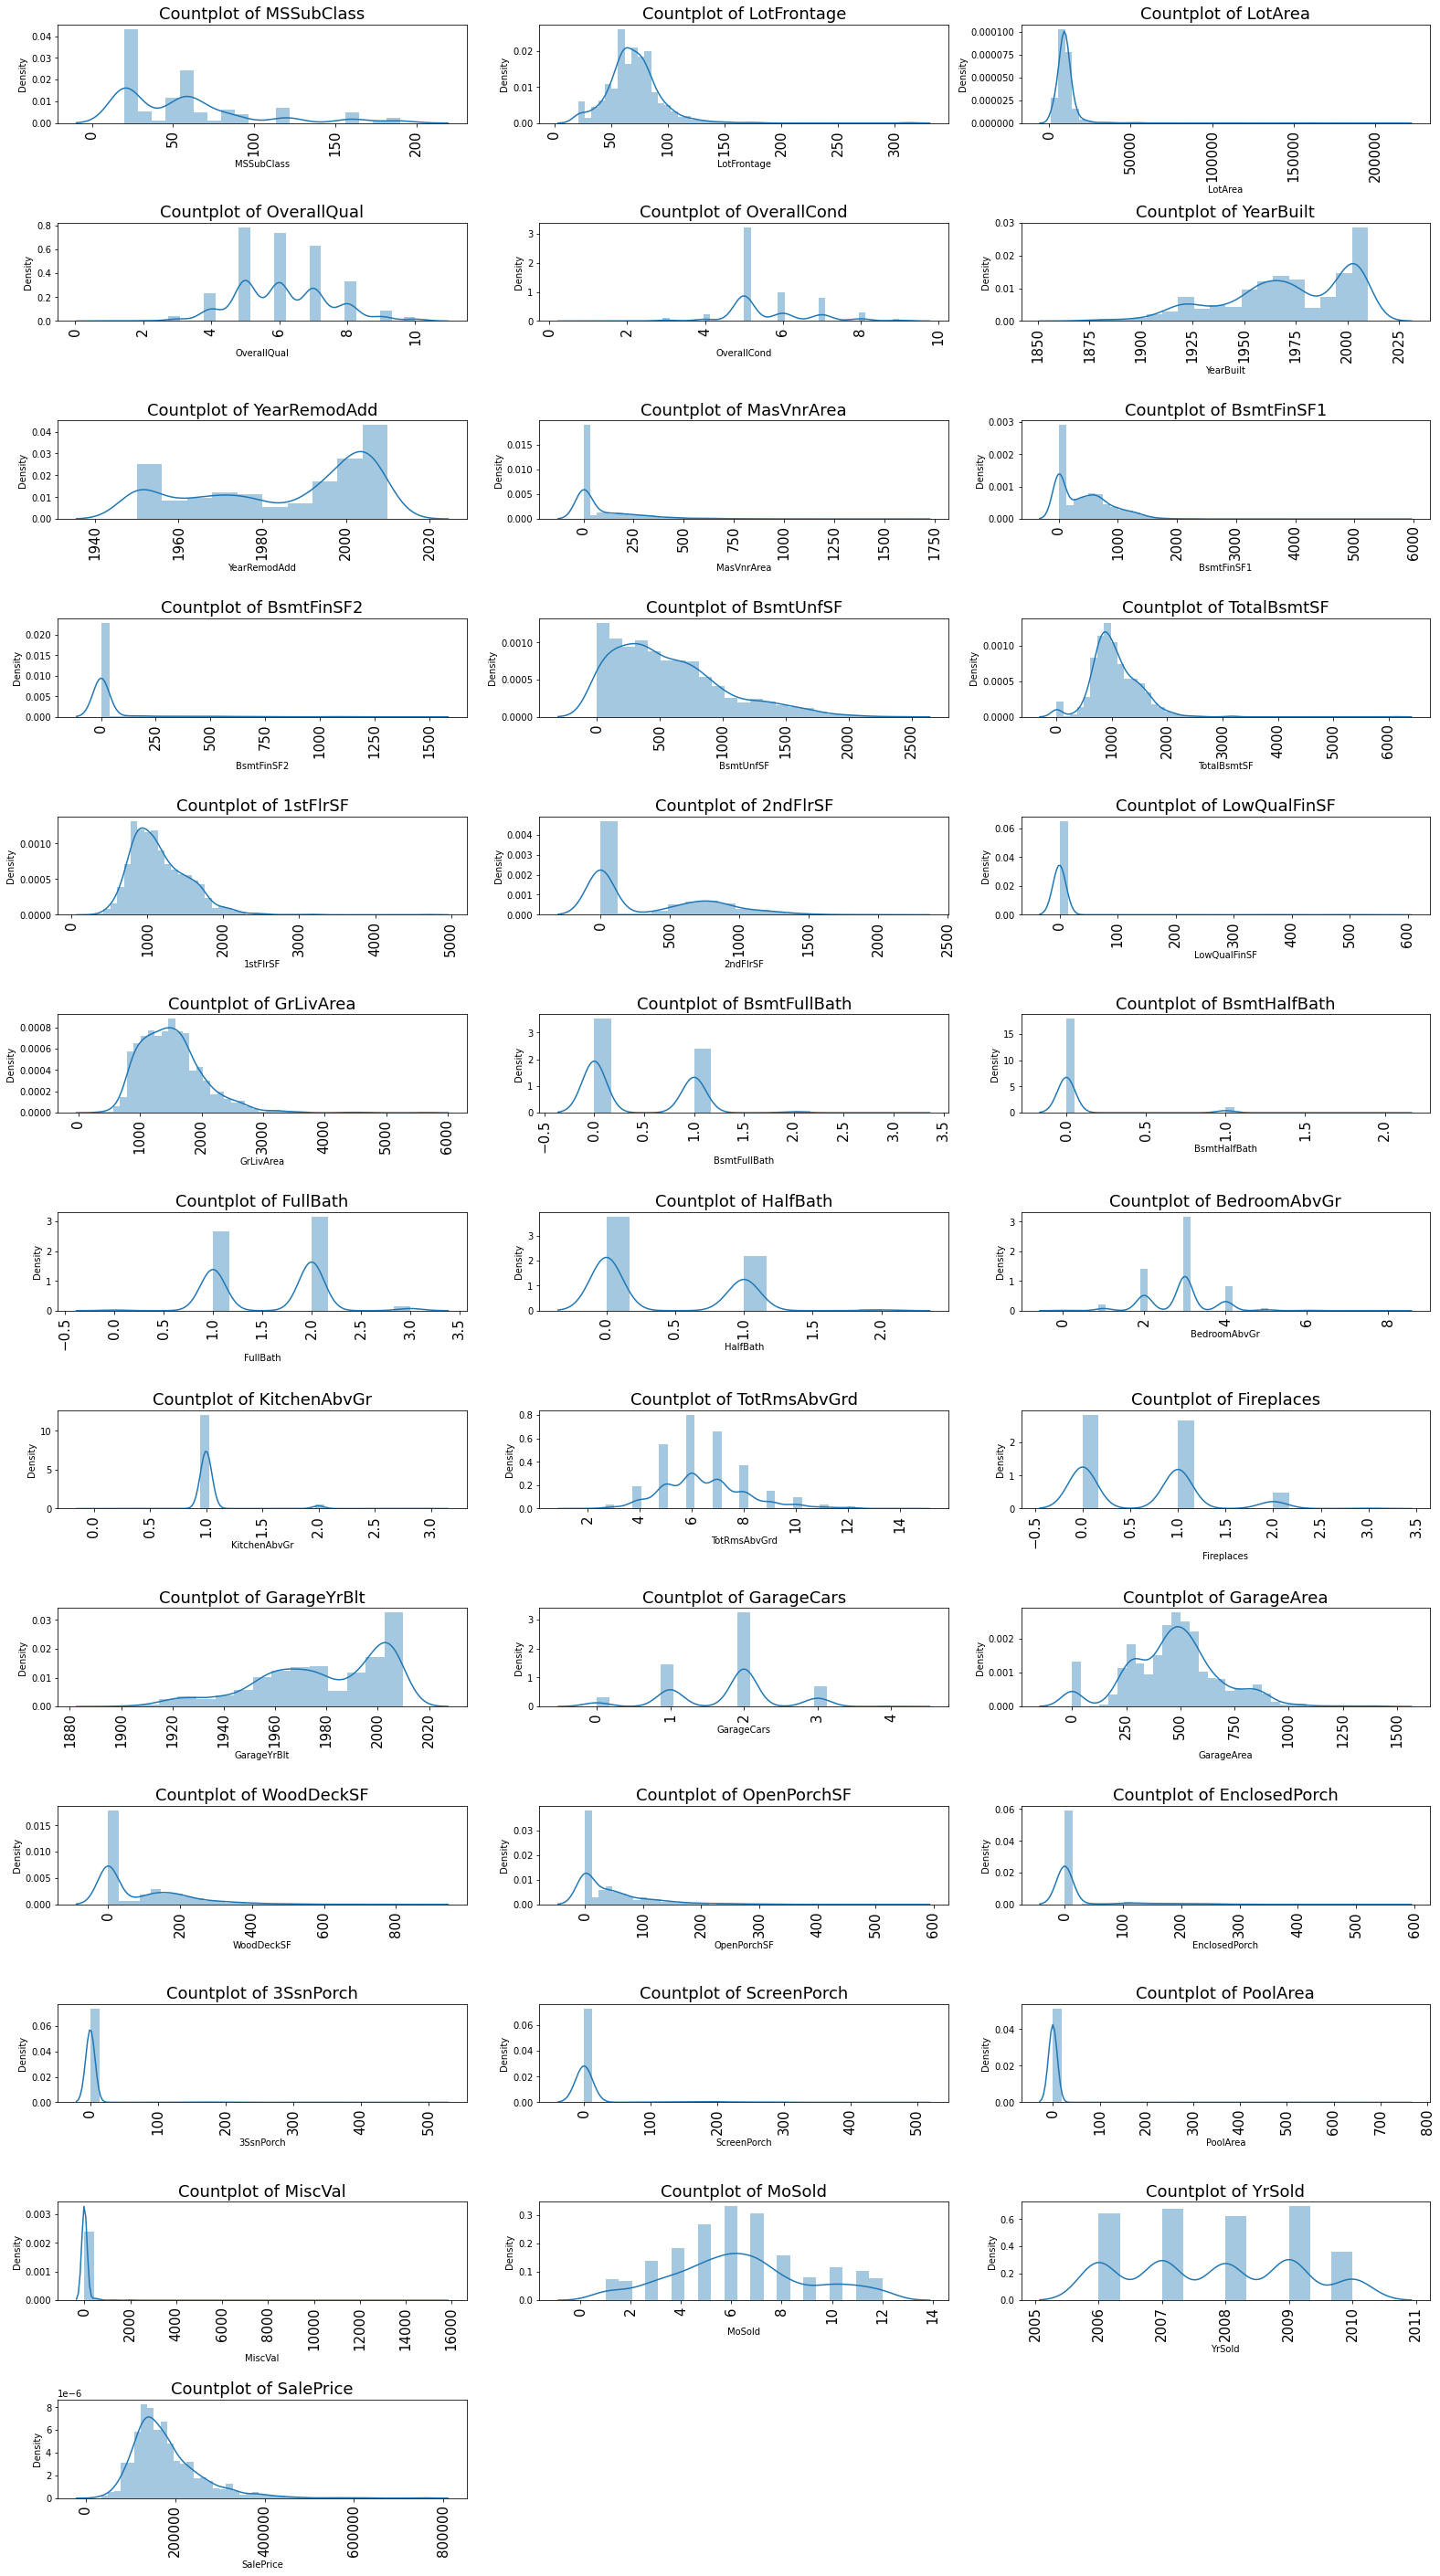

In [16]:
plt.figure(figsize=(22,300))
for i in range(len(col1)):
    plt.subplot(100,3,i+1)
    sns.distplot(data[col1[i]])
    plt.title(f"Countplot of {col1[i]}",fontsize=18)
    plt.xticks(rotation=90,fontsize=15)
    plt.tight_layout()

#Observation
1-From LotFrontage i cna say mostly people have value between 60-40

2-From LotArea i can say the value is between 0-25000

3-From Total square feet of basement area i can say the value is mostly in between 100-2000 and moslty people have the basement of size 800-1100

4-From grlivarea i can say moslty people have the are between 1200-1900

5-From GarageArea i can say mostly people like to have area between 450-600

6-From saleprice i can say moslty people buy home between price 140000-190000 and also it is right skewed

In [17]:
from numpy import mean
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

#Bivariate Analysis

Text(0, 0.5, 'Average SalesPrice')

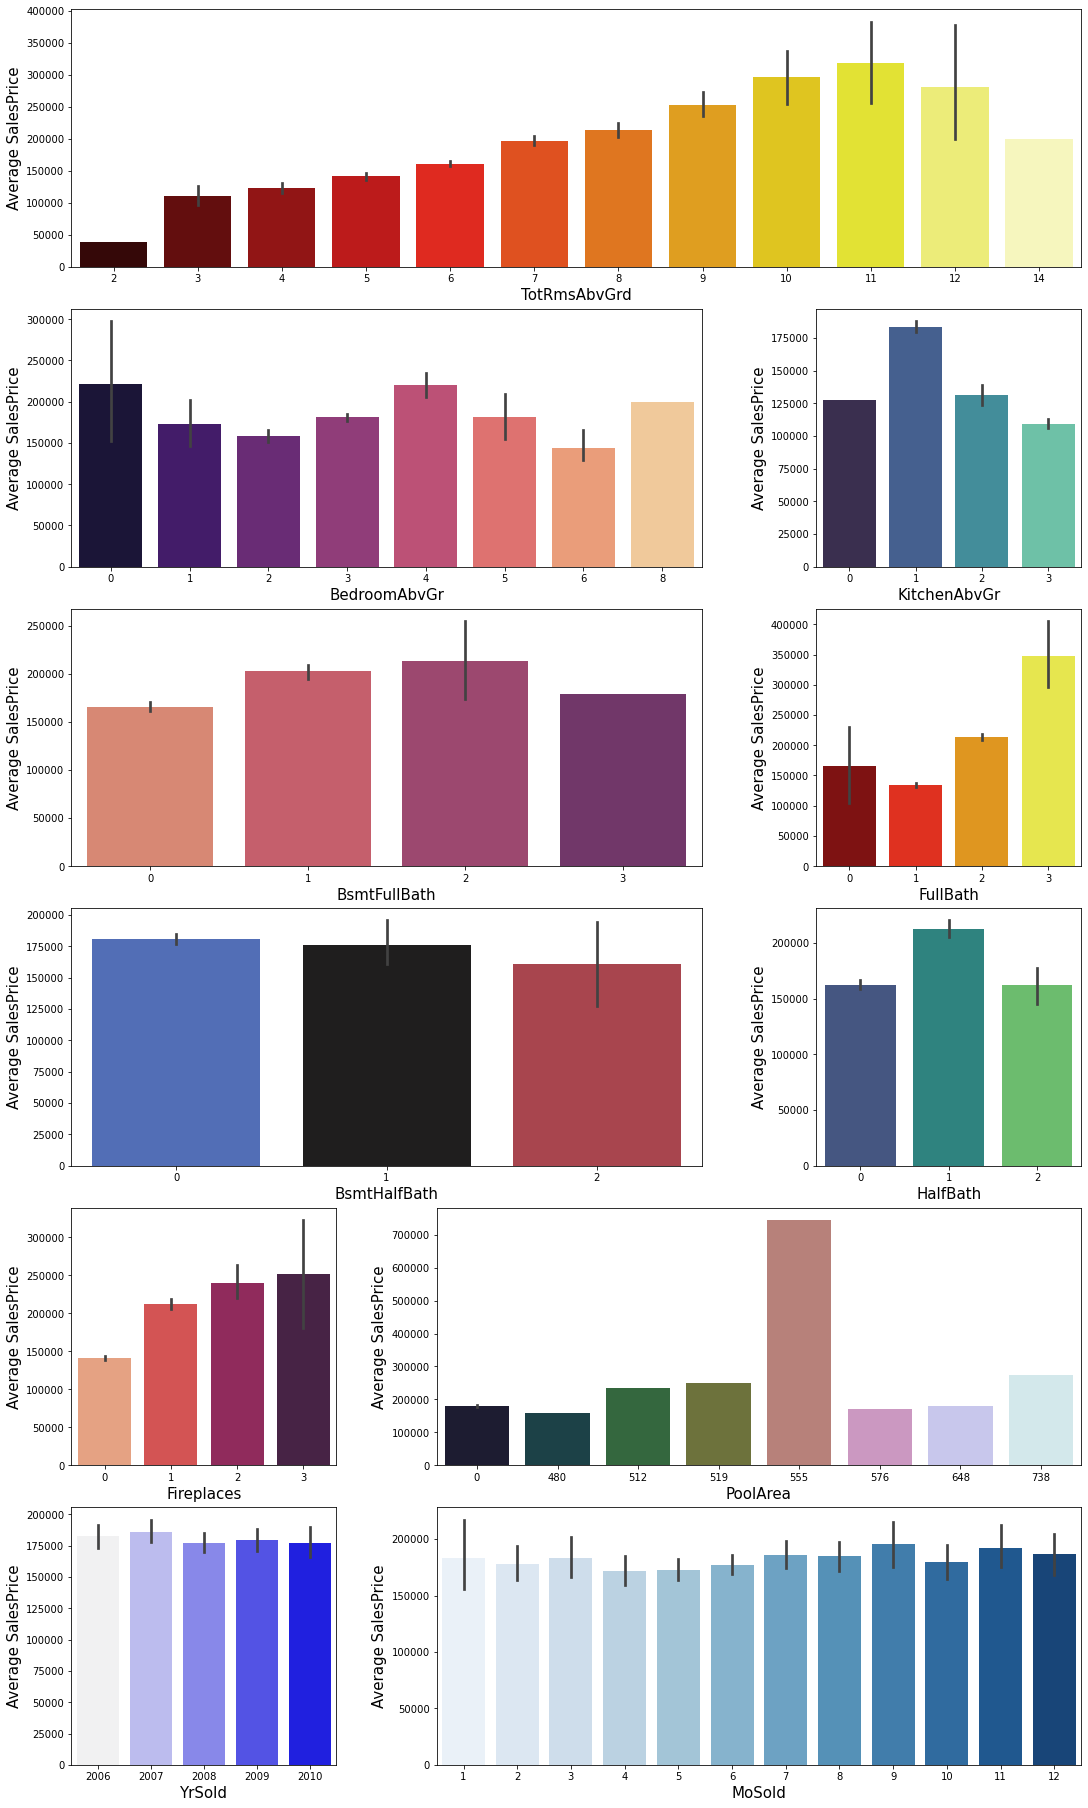

In [18]:
fig=plt.figure(constrained_layout=True,figsize=(15,25))
gs=GridSpec(6,3,figure=fig)

plt.subplot(gs[0,:])
a1=sns.barplot(data=data,x="TotRmsAbvGrd",y="SalePrice",estimator=mean,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1=sns.barplot(data=data,x="BedroomAbvGr",y="SalePrice",estimator=mean,palette='magma')
plt.xlabel("BedroomAbvGr",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[1,-1])
a1=sns.barplot(data=data,x="KitchenAbvGr",y="SalePrice",estimator=mean,palette='mako')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1=sns.barplot(data=data,x="BsmtFullBath",y="SalePrice",estimator=mean,palette='flare')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[2,-1])
a1=sns.barplot(data=data,x="FullBath",y="SalePrice",estimator=mean,palette='hot')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1=sns.barplot(data=data,x="BsmtHalfBath",y="SalePrice",estimator=mean,palette='icefire')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[3,-1])
a1=sns.barplot(data=data,x="HalfBath",y="SalePrice",estimator=mean,palette='viridis')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1=sns.barplot(data=data,x="Fireplaces",y="SalePrice",estimator=mean,palette='rocket_r')
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1=sns.barplot(data=data,x="PoolArea",y="SalePrice",estimator=mean,palette='cubehelix')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1=sns.barplot(data=data,x="YrSold",y="SalePrice",estimator=mean,palette='light:b')
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1=sns.barplot(data=data,x="MoSold",y="SalePrice",estimator=mean,palette='Blues')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

#Obseravtion

1-Total Rooms Above Ground-As the room no. increasing the average price is also increasing till 11th room after that price start decreasing

2-Bedroom ABove Ground-For the 0,4,8 Bedroom price is high and price is very less for 6 and 2

3-Kitchen Above Ground-as the no of kitchen is increasing the price is reducing and mostly people take one kitchen only

4-In Basement full bathrrom and half bathrooms as the bathroom size increasing the price is also increasing

5-Fireplaces-As the fireplaces increasing the sale price is also increasing

6-PoolArea-as big the pool the more costly the house

7-YRsold-the price was high in 2006 as comapre to old year prices descresed in 2008-10

8-MOSold-most of the people who sold there home in 09 month they got high price and people who sold there home on 4th month got less price

Text(0.5, 1.0, 'Land Slope')

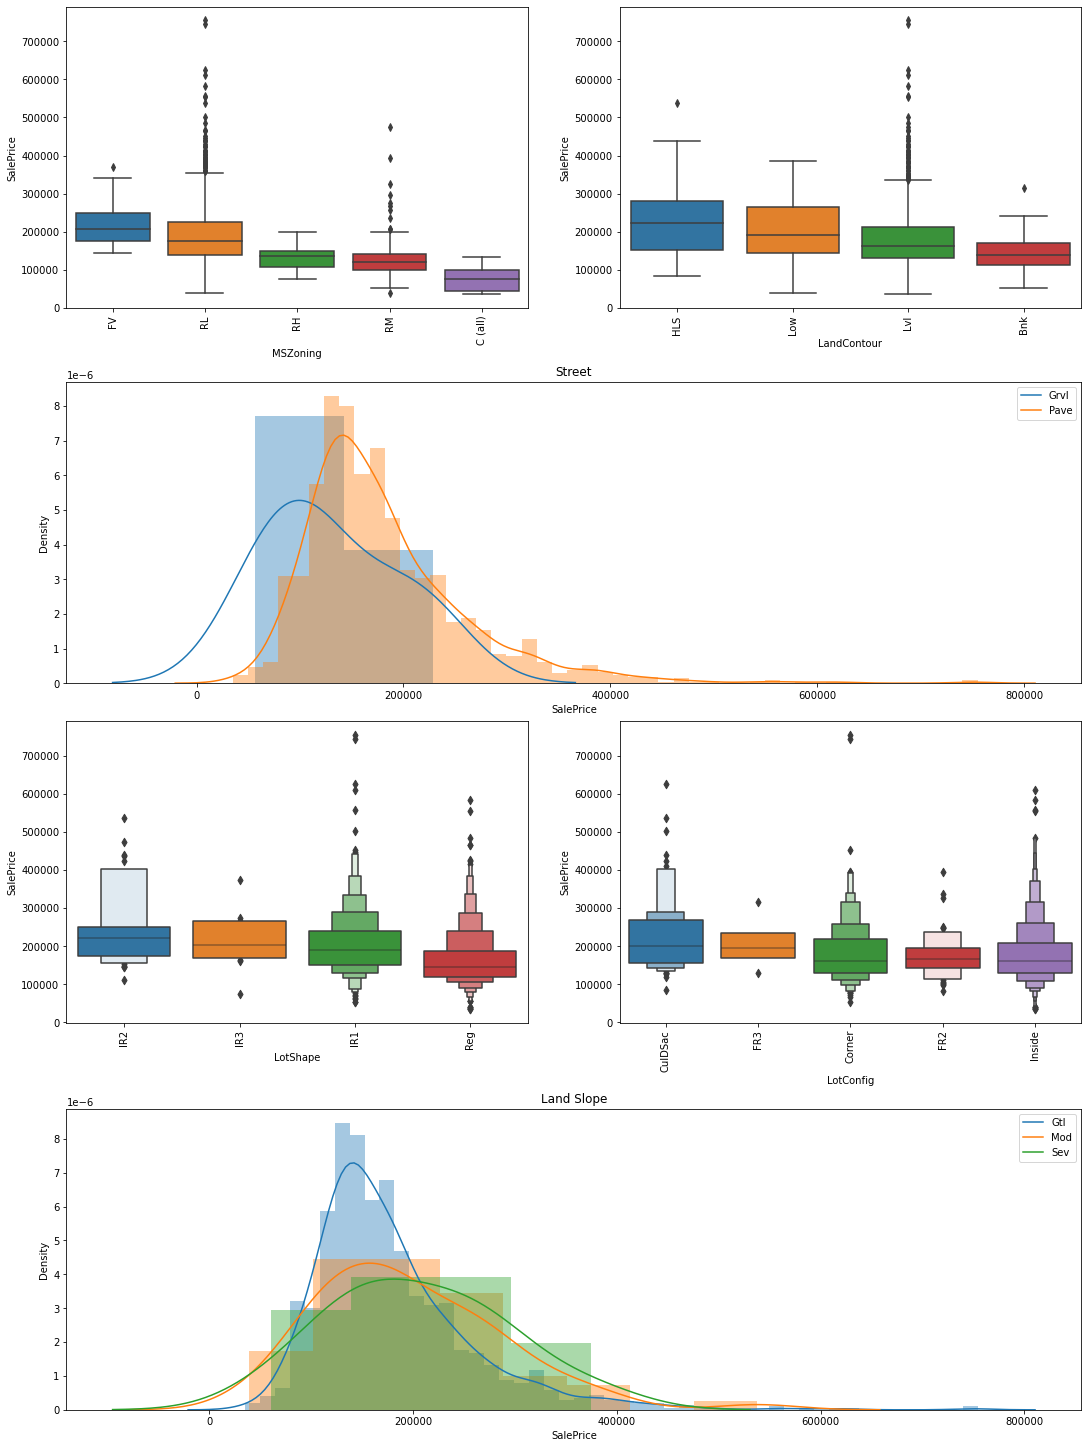

In [19]:
fig=plt.figure(constrained_layout=True,figsize=(15,20))
gs=gridspec.GridSpec(4,2,figure=fig)

plt.subplot(gs[0,0])
table=data.groupby(['MSZoning'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='MSZoning',y='SalePrice',order=table['MSZoning'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[0,1])
table=data.groupby(['LandContour'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='LandContour',y='SalePrice',order=table['LandContour'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[1,:])

a1=sns.distplot(data[data['Street']=='Grvl']['SalePrice'])
a1=sns.distplot(data[data['Street']=='Pave']['SalePrice'])
plt.legend('upper right',labels=['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table=data.groupby(['LotShape'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='LotShape',y='SalePrice',order=table['LotShape'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[2,1])
table=data.groupby(['LotConfig'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='LotConfig',y='SalePrice',order=table['LotConfig'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[3,:])

a1=sns.distplot(data[data['LandSlope']=='Gtl']['SalePrice'])
a1=sns.distplot(data[data['LandSlope']=='Mod']['SalePrice'])
a1=sns.distplot(data[data['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right',labels=['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

#Obseravtions

1-MSZoning-Floating Village Residential zone (FV) is having higher sale price of around 2 lakhs. While Commercial Zones are Having the lowest sale prices and we see a varaition in sale prices in different zones which makes it an important feature foe our prediction.

2-LandCountour-if the house has significant slope on both sides (HLS) or in nearly flat  (Low),sale prices is more. For depressed and blanked slopes,Sale price fall down

3-Street-For flat stones or bricks access,Price is higher and majority of houses with gravel have price around 2 lakhs but as there is very less data for gravel street type this feature is not that important

4-LotShape-We can see that houses with regular Shapes have low price and as the irregularity increases, the average sale price of the house also increases

5-LotConfig-The configuration of the lot does not appear to vary the prices.the property with cul de sac and fr3 configuration on average are having high value than the other configuration

6-LandSlope-Most of the properties having gentle slope and are lowest prices,while properties having moderate or severe slope have higher value.

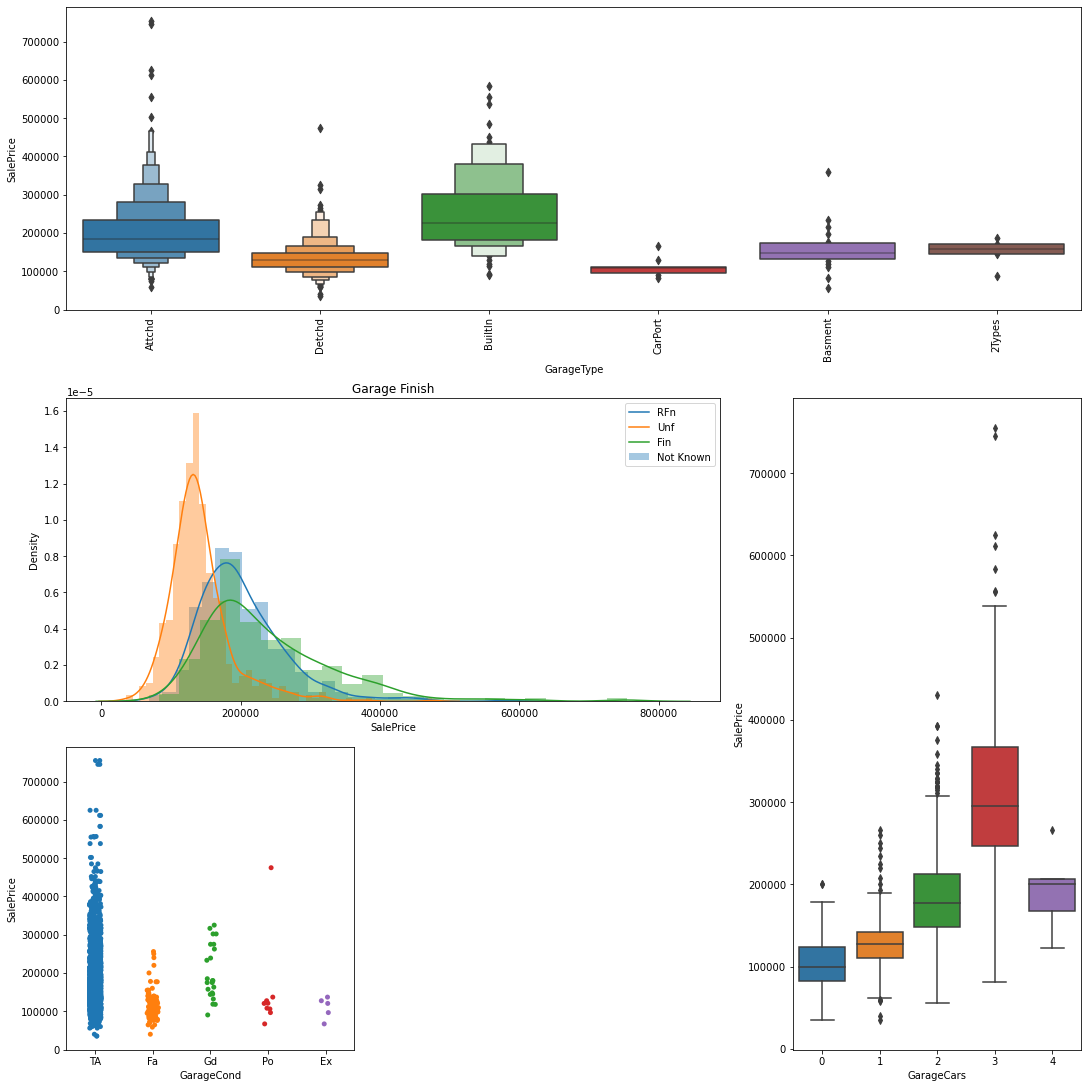

In [20]:
fig=plt.figure(constrained_layout=True,figsize=(15,15))
gs=GridSpec(3,3,figure=fig)

plt.subplot(gs[0,:])
a1=sns.boxenplot(data=data,x='GarageType',y='SalePrice')
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[1,:-1])
sns.distplot(data[data['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right',labels=['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1=sns.boxplot(data=data,x="GarageCars",y="SalePrice")


plt.subplot(gs[-1,0])
a1=sns.stripplot(data=data,x="GarageQual",y="SalePrice")


plt.subplot(gs[-1,0])
a1=sns.stripplot(data=data,x="GarageCond",y="SalePrice")

#Obseravtion
1-Garage Type-Houses with built in or attached garages tend to have the highest prices. Those without a garage or a car port tend to have the lowest prices.

2-Garage Finish-Finished and roughly finished garages account for higher sale price than unfinished ones.and the properties which dont have a garage have the lowest price.

3-GarageCars-here garage cars refers to size of garage in car capacity so higher the number more the sale price

Text(0.5, 0.98, 'Sale Type and Condition')

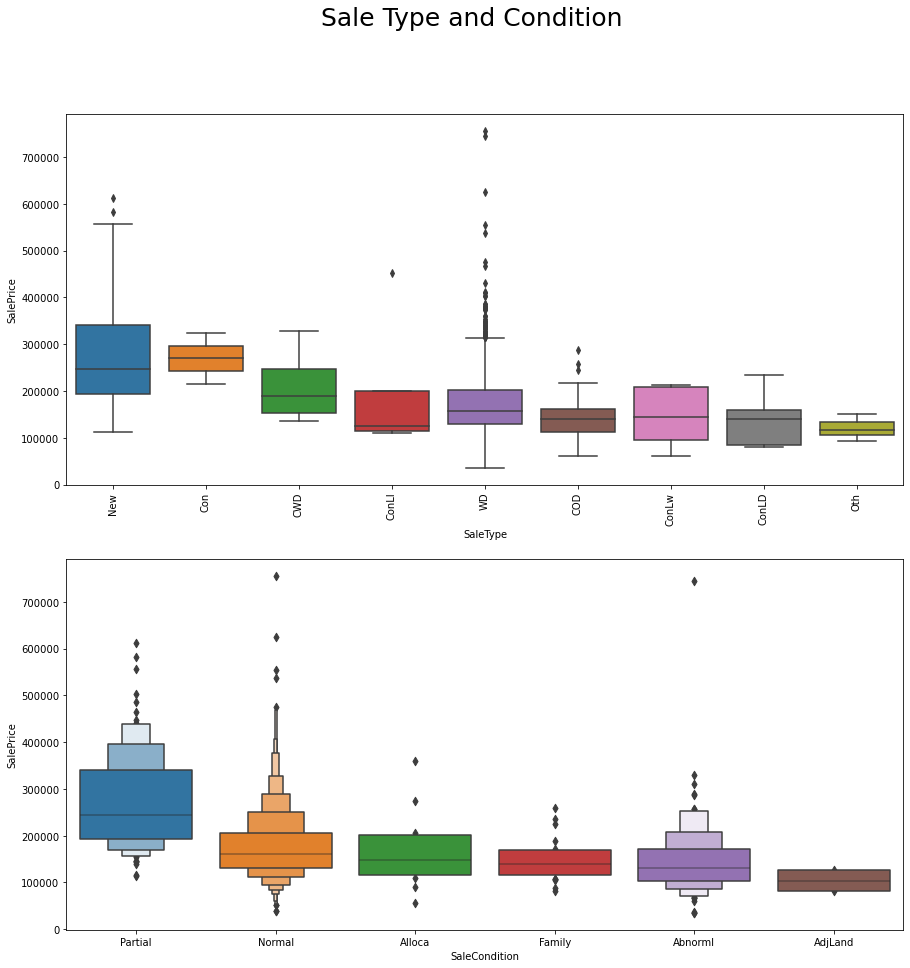

In [21]:
fig=plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
table=data.groupby(['SaleType'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='SaleType',y='SalePrice',order=table['SaleType'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
table=data.groupby(['SaleCondition'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='SaleCondition',y='SalePrice',order=table['SaleCondition'].to_list())

fig.suptitle("Sale Type and Condition",fontsize=25)

#Obseravtion
1-Sale Type-Most of the properties are on warranty deed sale. The manor in which the house is sold appears to have different price ranges

2-Sale Condition-if the house to be sold is in partial or normal condition,the price will definitely be higher than the rest of the conditions.

**bases on the analysis of the above categorical features,we can conclude that the following features are important in predicting the sale price.**

1-MSSubclass and mszoning

2-all the quality features,as the houses with average,good,excellent quality features will have higher sale price

3-Fireplaces and garage cars,more the no. , higher the sale price

4-we also saw variation in absement exposure

5-And lastly sale type and sale conditon are also one of the important features

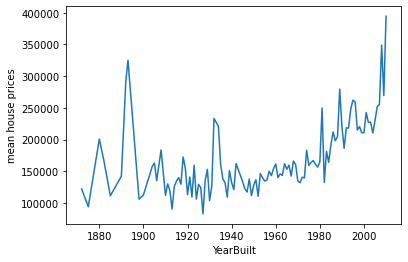

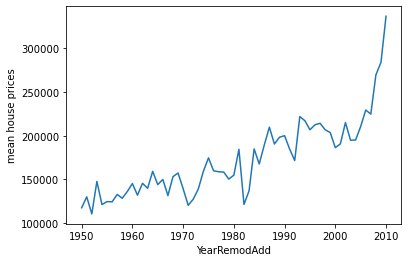

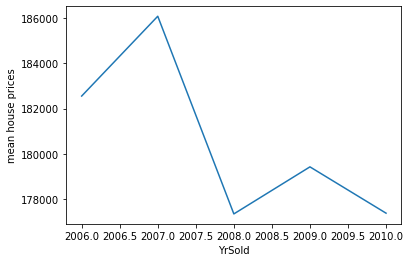

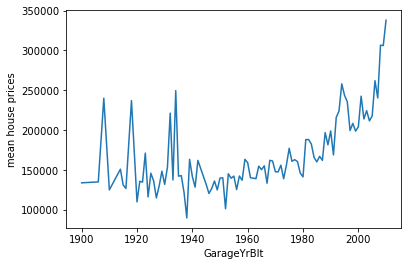

In [22]:
year_features=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
for feature in year_features:
    ax=data.groupby([feature])['SalePrice'].mean().plot()
    plt.ylabel("mean house prices")
    plt.show()

#Obseravtion
WE can see that the houses and garage which were built during 0s have less sale price than the newer ones

with every year,house price increases

But if see,Year Sold feature the price fall down with each year which is strange.

Due to the strange behaviour in year sold,we subtract each feature with year sold

#Checking Skewness

In [23]:
data.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

**There are skewness so we need to remove them**

In [24]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
data.shape

(1460, 81)

In [26]:
data2=data.select_dtypes(exclude='object')

In [27]:
X_col=data2.columns.values

#Checking Outliers

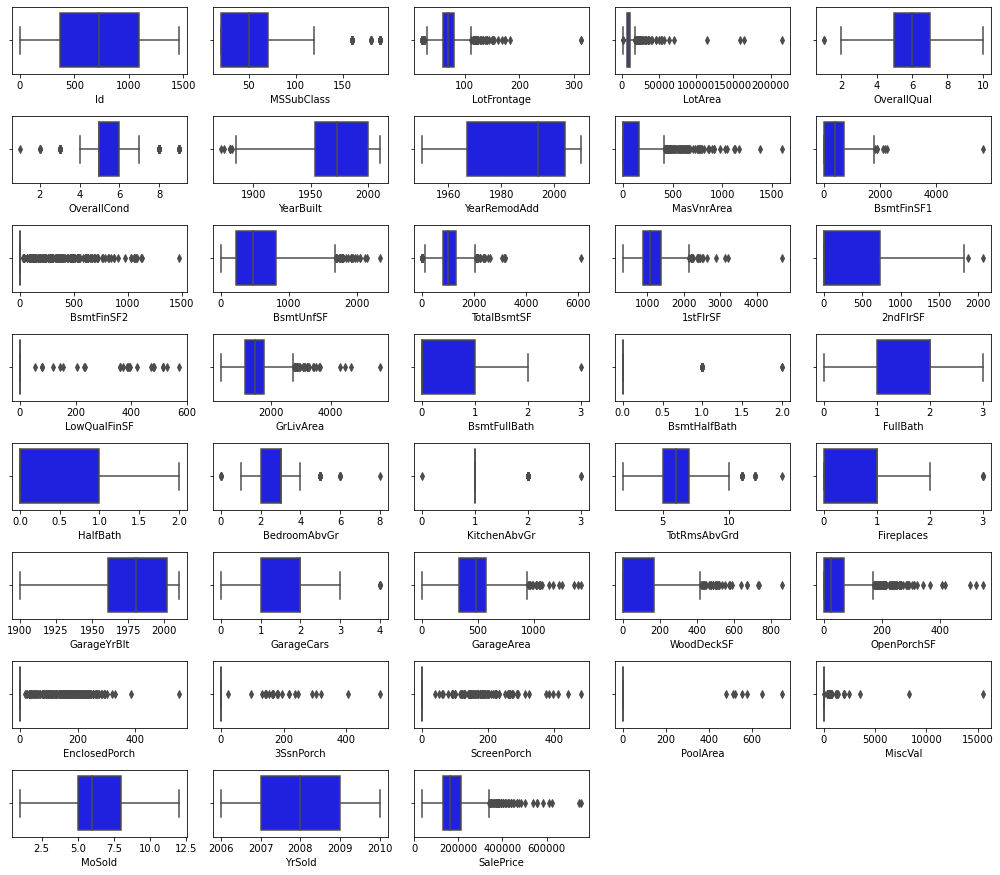

In [28]:
plt.figure(figsize=(14,30))
for i in range(0,len(X_col)):
    plt.subplot(20,5,i+1)
    ax=sns.boxplot(data2[X_col[i]],color='blue')
    plt.tight_layout()

**There Are many outliers so we need to remove them**

#Building Pipeline

#Treating Missing Values

In [53]:
class Preprocess_Missingvalues:
  def __init__(self):
    pass

  def fit(self,X,y=None):
    return self

  def transform(self,X):
    X['LotFrontage']=X.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))
    X['Electrical']=X['Electrical'].fillna(X['Electrical'].mode()[0])
    for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','PoolQC','Fence','MiscFeature','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Alley']:
                X[col]=X[col].fillna('None')
    for col in ['GarageYrBlt','MasVnrArea']:
      X[col]=X[col].fillna(0)

    X=X.drop(['Utilities','Id'],axis=1)
    return X

*Here i am creating a class which can treat missing value as the value is from categorical column or from numerical column it will handle it and i am also droping some columns that are not useful like id it only represent the unique ids*

#Feature Engineering

In [54]:
class Feature_Engineering:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self 
  def transform(self,X):
     X['SqFtPerRoom']=X['GrLivArea']/X['TotRmsAbvGrd']+(X['TotRmsAbvGrd']+
                                                        X['FullBath']+
                                                        X['HalfBath']+
                                                        X['KitchenAbvGr'])
     X['Total_Home_Quality']=X['OverallQual']+X['OverallCond']
     X['Total_Bathrooms']=(X['FullBath']+(0.5*X['HalfBath'])+
                           X['BsmtFullBath']+(0.5*X['BsmtHalfBath']))
     X['HighQualSF']=X['1stFlrSF']+X['2ndFlrSF']
     return X

*Here i am creating more features for my column so it can perform well with machine learning models feature engineering is one of the most important method in ML so we have many bathrooms like some are fullbath and we also have many halfbathrooms like 2-3 half bathrooms form here i can am creating a total bathroom feature and also we have a are of different different things so from there i am creating the sqftperroom*

#Removing Skewness

In [55]:
class skewness_remove:
  def __init__(self,skew=0.5):
    self.skew=skew
  
  def fit(self,X,y=None):
    return self

  def transform(self,X):
    x=X.copy()
    X_num=X.select_dtypes(exclude='object')
    skewness=X_num.apply(lambda x:x.skew())
    skewness_col=skewness[abs(skewness)>=self.skew].index
    X[skewness_col]=power_transform(X[skewness_col])
    X=pd.DataFrame(X,columns=x.columns)
    X = pd.get_dummies(X)
    return X

*Here i am removing skewness as we seen above we had a lot of skewness of i have created a class where if my any column is having skewness more then 0.5 it will remove the skewness of that*

#Feature Transformation

In [56]:
class Encoding:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    le=LabelEncoder()
    cols= ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')
    for c in cols:
      X[c]=le.fit_transform(X[c])
    return X

*Here i am using LabelEncoder because we already have many columns if i will use onehot i will increase the dimension of the data which will create the problem for machine learning model to understand things thats why i am using labelencoder*

#Removing Outliers

In [57]:
class remove_outliers:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    for col in X.columns:
      percentile=X[col].quantile([0.01,0.98]).values
      X[col][X[col]<=percentile[0]]=percentile[0]
      X[col][X[col]>=percentile[1]]=percentile[1]
    return X

*As we have seen above we had lot of outliers so i am using here percentile method to remove outliers somethimes what happen is if i am using zscore and IQR method it will delete all the data so with the help of percentile method we can replace the outliers with percentile value and we also dont loose the data as well*

#Feature Scaling

In [58]:
class Feature_Scaling:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    x=X.copy()
    scale=StandardScaler()
    X=scale.fit_transform(X)
    X=pd.DataFrame(X,columns=x.columns)
    return X

*In this am using StandardScaler to scale my all big value in same scale*

In [59]:
from sklearn.pipeline import Pipeline

#Pipeline For Machine Learning

In [60]:
pipe=Pipeline([
               ("Preprocess_Missingvalues",Preprocess_Missingvalues()),                       #Removing and treating missing values
               ("Feature_Engineering",Feature_Engineering()),                                 #Adding more columns
               ("Encoding",Encoding()),                                                       #Feature transformation converting all the categorical columns into no. 
               ("remove_outliers",remove_outliers()),
               ("skewness_remove",skewness_remove()),
               ("Feature_Scaling",Feature_Scaling())                                          #scaling all the values
])

In [61]:
X=data.drop(['SalePrice'],axis=1)
y=data['SalePrice']

*Separating data into X and Y for ML*

In [62]:
def preprocess_new(df):
  df=pd.read_csv(df)
  df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))

  df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

  for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','PoolQC','Fence','MiscFeature','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
              'BsmtFinType1','BsmtFinType2','MasVnrType','Alley']:
              df[col]=df[col].fillna('None')

  for col in ['GarageYrBlt','MasVnrArea']:
    df[col]=df[col].fillna(0)

  df=df.drop(['Utilities','Id'],axis=1)

  df['SqFtPerRoom']=df['GrLivArea']/df['TotRmsAbvGrd']+(df['TotRmsAbvGrd']+
                                                    df['FullBath']+
                                                    df['HalfBath']+
                                                    df['KitchenAbvGr'])
  df['Total_Home_Quality']=df['OverallQual']+df['OverallCond']
  df['Total_Bathrooms']=(df['FullBath']+(0.5*df['HalfBath'])+
                        df['BsmtFullBath']+(0.5*df['BsmtHalfBath']))
  df['HighQualSF']=df['1stFlrSF']+df['2ndFlrSF']
  return df

In [63]:
preprocess_new('test.csv')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,6,2010,WD,Normal,186.200000,11,1.0,896
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,Gar2,12500,6,2010,WD,Normal,230.500000,12,1.5,1329
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,3,2010,WD,Normal,281.500000,10,2.5,1629
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,6,2010,WD,Normal,240.142857,12,2.5,1604
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,None,0,1,2010,WD,Normal,264.000000,13,2.0,1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,6,2006,WD,Normal,226.400000,11,1.5,1092
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,4,2006,WD,Abnorml,191.000000,9,1.5,1092
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,9,2006,WD,Abnorml,183.857143,12,2.0,1224
1457,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,...,Shed,700,7,2006,WD,Normal,169.666667,10,1.5,970


In [64]:
X_new=pipe.fit_transform(X)

In [65]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [66]:
X_new.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF
0,0.493428,-0.185152,-0.262821,-0.240390,0.0,0.024699,0.752862,0.337049,0.617130,-0.237571,...,-0.192177,-0.192177,-1.599111,0.138777,0.388981,0.032281,-0.328089,0.206546,1.71989,0.555647
1,-1.164279,-0.185152,0.513160,0.044263,0.0,0.024699,0.752862,0.337049,-1.050571,-0.237571,...,-0.192177,-0.192177,-0.489110,-0.614439,0.388981,0.032281,-0.478531,1.460421,0.39829,-0.396976
2,0.493428,-0.185152,-0.107625,0.423406,0.0,0.024699,-1.371959,0.337049,0.617130,-0.237571,...,-0.192177,-0.192177,0.990891,0.138777,0.388981,0.032281,1.592487,0.206546,1.71989,0.694604


#Checking multicollinearity

<AxesSubplot:>

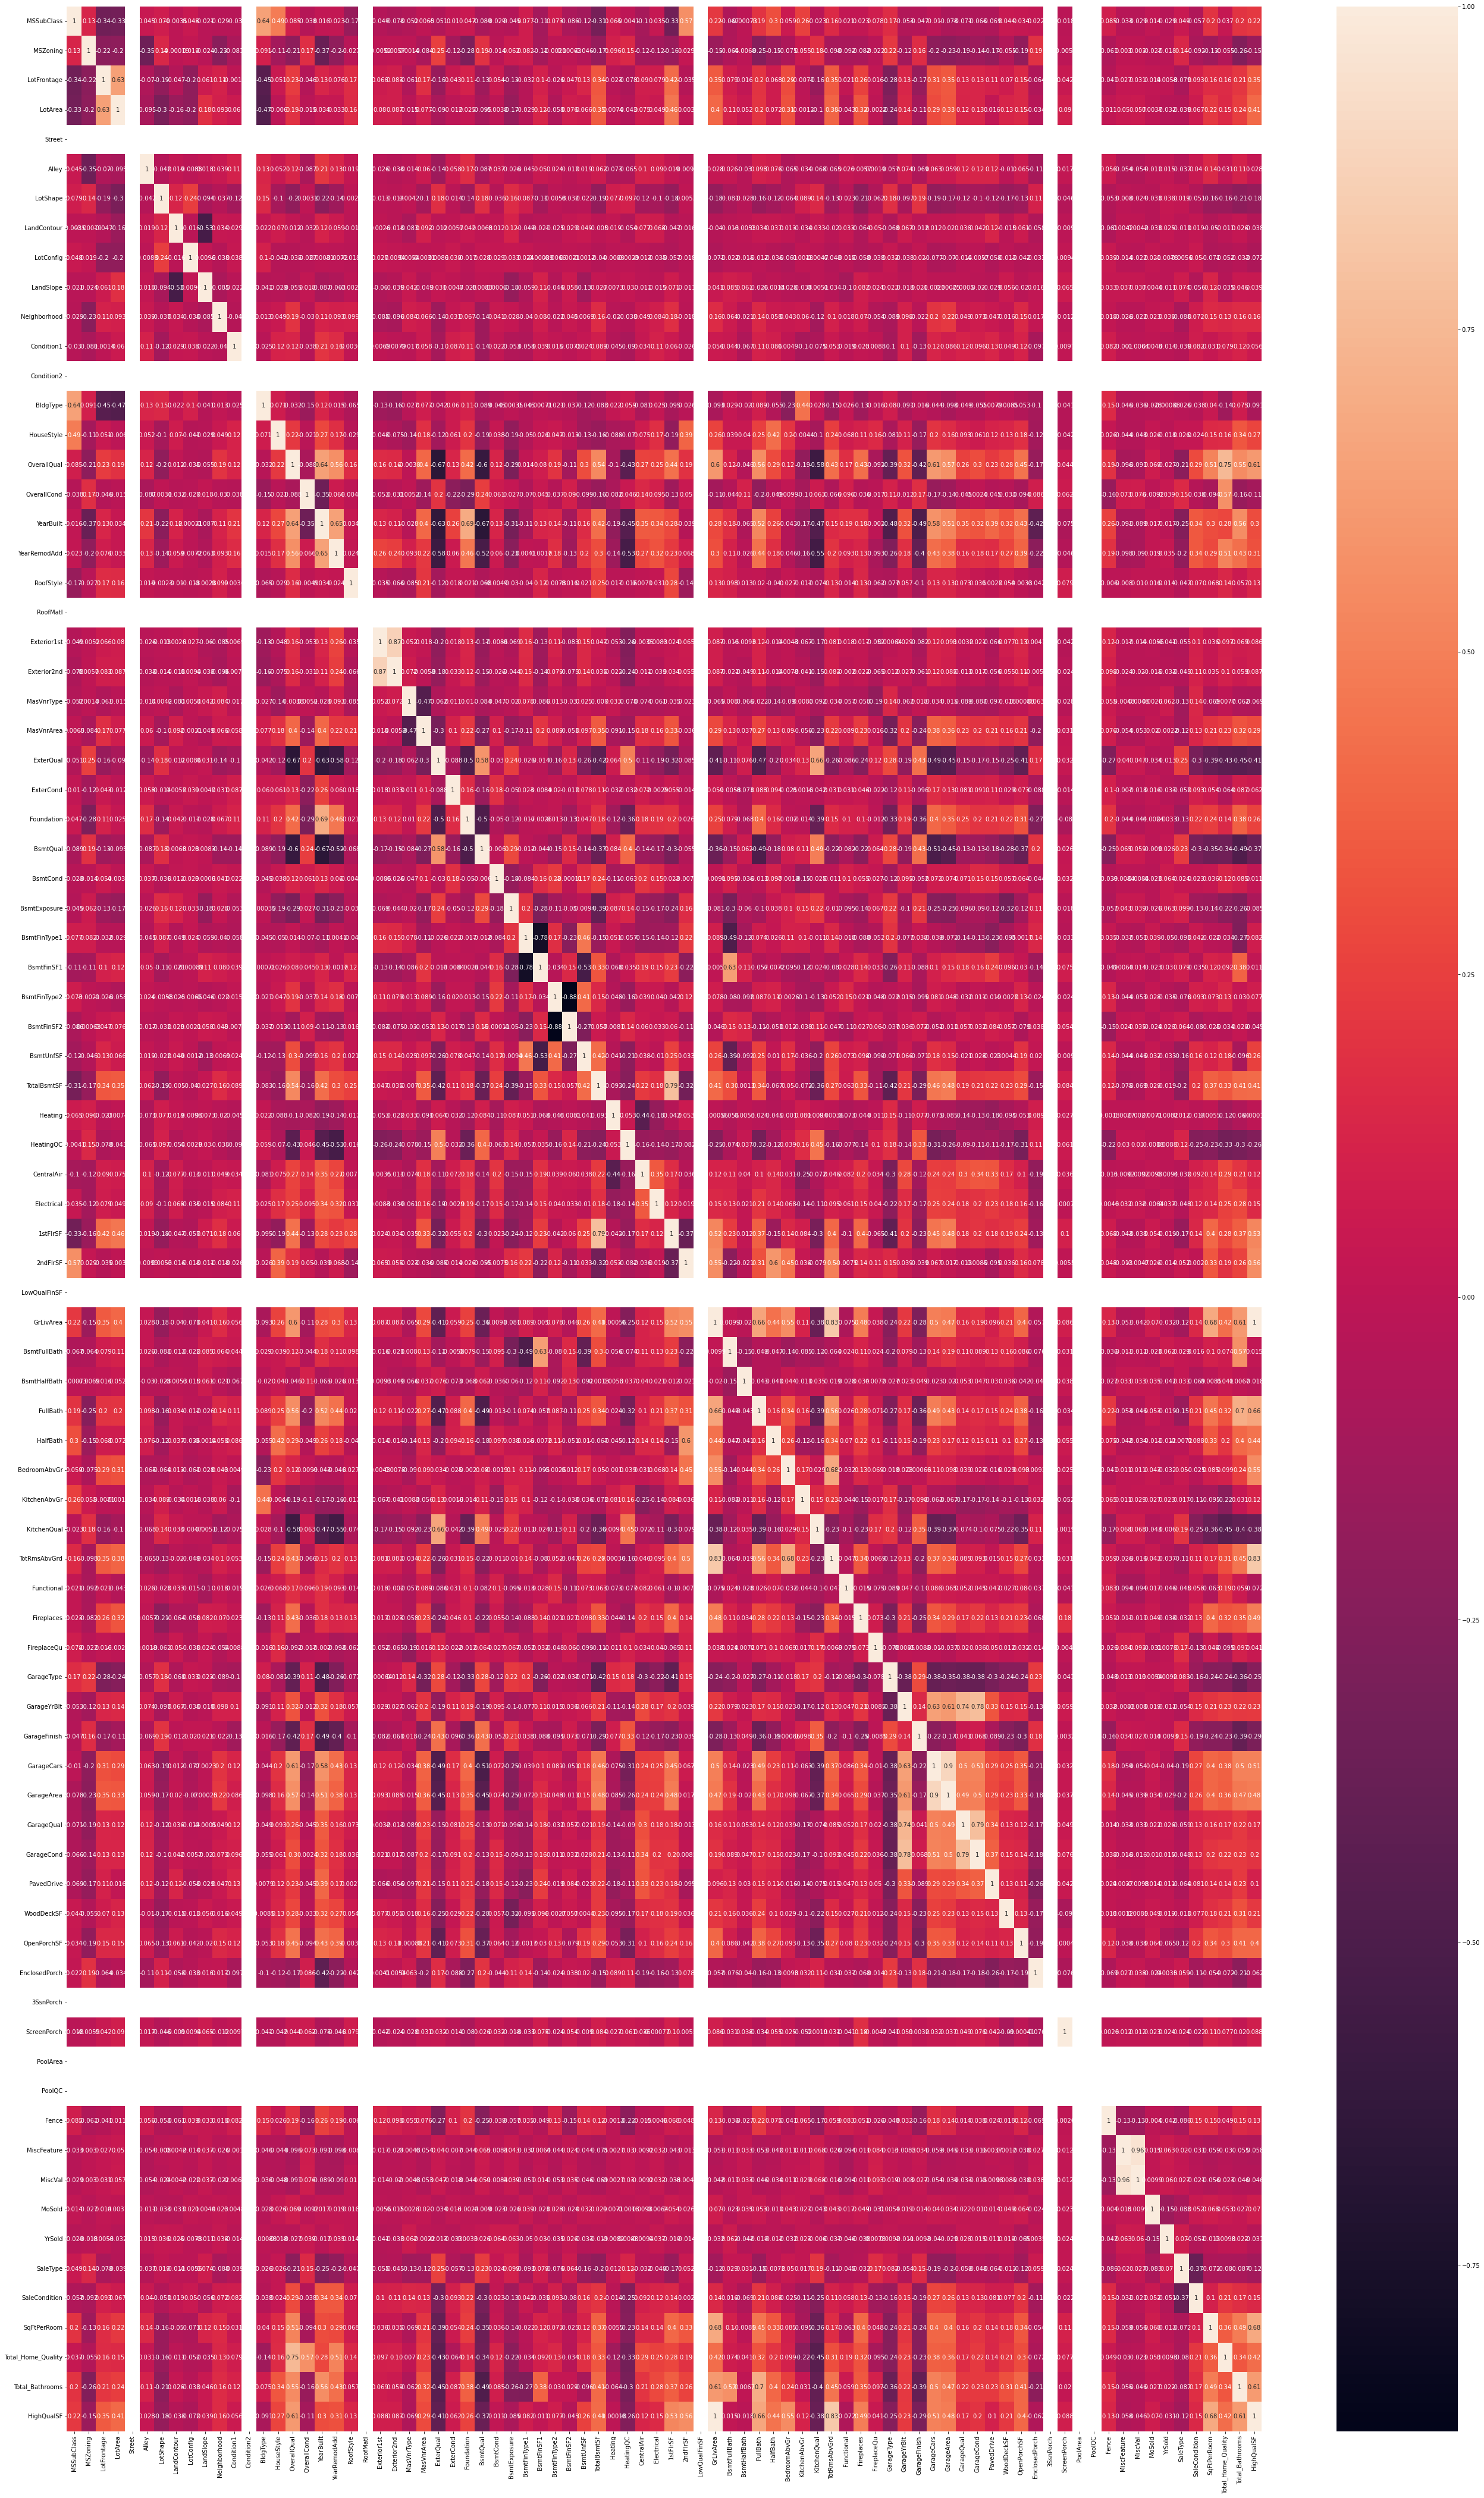

In [67]:
X_corr=X_new.corr()
plt.figure(figsize=(45,75))
sns.heatmap(X_corr,annot=True)

**The heatmap is very big so this code will help me to understand the which feature is highly correlated to each other**

In [68]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        print(corr_matrix.iloc[i,j],corr_matrix.columns[i],corr_matrix.columns[j])
        col_corr.add(colname)
        return col_corr

In [69]:
corr_features=correlation(X_new,0.90)

0.960118006985271 MiscVal MiscFeature


In [70]:
X_new=X_new.drop(['MiscVal','HighQualSF'],axis=1)

*There total four columns that are highly correlated to each other i am dropping two of them*

#Target Column Transformation

<AxesSubplot:title={'center':'Log Transform Distribution'}, xlabel='SalePrice', ylabel='Density'>

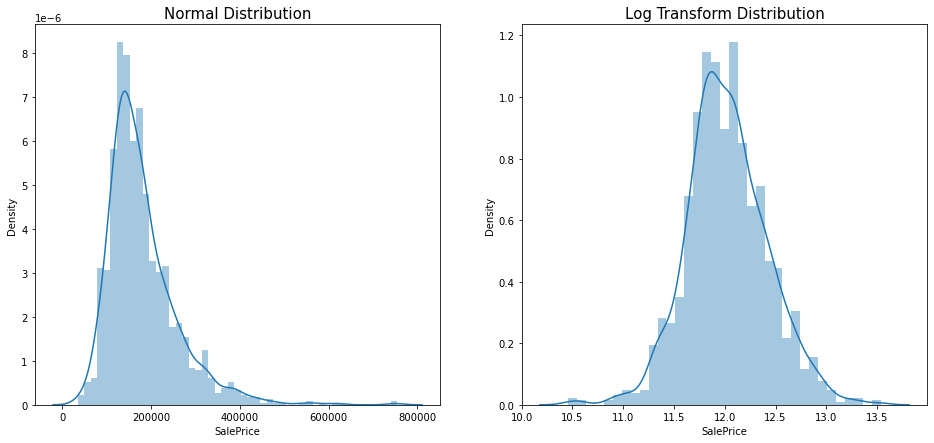

In [71]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Log Transform Distribution",fontsize=15)
sns.distplot(np.log(y))

*Here my target column is right skewed and we can transform your target column if my target column is right skewed so i am transforming it and at the time of prediction i will inverse it so there will be no effect of it on our prediction*

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X_new,np.log(y),test_size=0.3,random_state=42)

*Spliting data into train and test*

In [73]:
lr =LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
y_predict[:5]

array([11.91847356, 12.70249538, 11.62029011, 12.01249055, 12.6607451 ])

Predicted using Linear Regression

In [74]:
mlr_score = lr.score(X_test, y_test)
mlr_score 

0.8946261837732269

In [75]:
from sklearn.metrics import mean_squared_error
import math

mlr_rmse = math.sqrt(mean_squared_error(y_test,y_predict))
mlr_rmse

0.1337021458826824

In [76]:
rfr =RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_predict = rfr.predict(X_test)
rfr_predict[:5]

array([11.85802858, 12.65768011, 11.67445344, 11.98477204, 12.68631833])

Predicted using Random Forest Classifier

In [77]:
rfr_score = rfr.score(X_test, y_test)
rfr_score 

0.8911878400324318

As we can see that the liner regression model is predicting good as compared to random forest so lets take the predicted values of Linear Regression model as our output.

In [78]:
my_prediction = pd.DataFrame({'SalePrice': y_predict})
my_prediction.to_csv('My_Prediction.csv', index=False)